In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define path name to the excel file and save as df 
path_to_apps = "/Users/richardwsong/Desktop/bh2025_reg.xlsx"
df = pd.read_excel(path_to_apps)

# Retrieve the consent to use data for statistical purposes (column 25). Only include rows where the value is "Yes"
df = df[df.iloc[:, 25] == "Yes"]

,Timestamp,Email Address,Have you ever participated in a Brainhack/Hackathon?,Name and surname(s),Institutional email address (your institutional email is required to verify your affiliation and grant access to the event),Affiliation (institute or department),GitHub account,Preferred pronouns,Do you consider yourself a member of any of the following traditionally underrepresented groups in science?,Career level,...,"During the BrainHack Vanderbilt, I would like to learn more about the following methods:",Do you give the Vandy Brainhack Organizing Committee the consent to use your anonymized data for statistical purposes?,All the talks and tutorials will be held on Zoom and they may be recorded. The videos may be shared on the Brainhack Global channels. Attendees' thumbnail windows and name tags might appear in the videos.,Code of Conduct (https://brainhack.org/code-of-conduct),Will you be attending in-person or virtually?,Do you have any access needs or disability accommodations that you would like us to know about?,Do you have any dietary restrictions?,T-Shirt Size Selection,Would you like to volunteer for BrainHack Vanderbilt 2024?,"We understand that plans can change, and we appreciate your cooperation in letting us know your availability. We want to ensure that everyone who wishes to attend has the opportunity to do so. To help us manage attendance effectively, we will be sending out a confirmation email one week before the event. \n\n""If I do not respond to this confirmation email, I acknowledge that my place at the event may be forfeited and given to an individual on the waitlist."""
0,2024-11-19 17:31:53.527,sunny.a.bhatt@vanderbilt.edu,No,Sunny Bhatt,sunny.a.bhatt@vanderbilt.edu,Department of Computer Science,https://github.com/sbhatt26,He/him/his,NaN,Graduate student,...,"Causality, Deep Learning, Granger Causality, H...",Yes,👍,I have read the Code of Conduct of the Brainha...,In-person,NaN,Vegan but do consume dairy products but not eggs,S,No,I have read the above statement and accept it.
1,2024-11-20 11:02:06.993,Amanda.Martinez-Lincoln@vanderbilt.edu,Yes,Amanda Martinez-Lincoln,Amanda.Martinez-Lincoln@vanderbilt.edu,"Special Education, Brain Institute",NaN,She/her/hers,"Women, Caregiver",Postdoc,...,"Modelling, MR Methodologies, Statistical Model...",Yes,👍,I have read the Code of Conduct of the Brainha...,In-person,NaN,NaN,M,No,I have read the above statement and accept it.
2,2024-11-20 11:03:55.166,sarah.hughes-berheim@vanderbilt.edu,Yes,Sarah Hughes Berheim,sarah.hughes-berheim@vanderbilt.edu,Special Education,NaN,She/her/hers,Women,Postdoc,...,"Diversity Inclusivity Equality, EEG Event rela...",Yes,👍,I have read the Code of Conduct of the Brainha...,In-person,Celiac Disease!,Gluten Free,L,No,I have read the above statement and accept it.
3,2024-11-20 11:28:06.991,deep.pankaj.shah@vanderbilt.edu,No,Deep Shah,deep.pankaj.shah@vanderbilt.edu,M.eng in Construction Management,.,He/him/his,NaN,Graduate student,...,"Bayesian Approaches, Causality, Connectome, Da...",Yes,👍,I have read the Code of Conduct of the Brainha...,In-person,NaN,Vegeterian,L,Yes,I have read the above statement and accept it.
4,2024-11-20 13:18:21.376,clair.hong@vanderbilt.edu,Yes,Clair Hong,clair.hong@vanderbilt.edu,"VU, Dept of Special Education",mkclairhong,She/her/hers,Women,Postdoc,...,"Bayesian Approaches, Causality, Connectome, Da...",Yes,👍,I have read the Code of Conduct of the Brainha...,In-person,NaN,NaN,M,No,I have read the above statement and accept it.


## Demographic Info

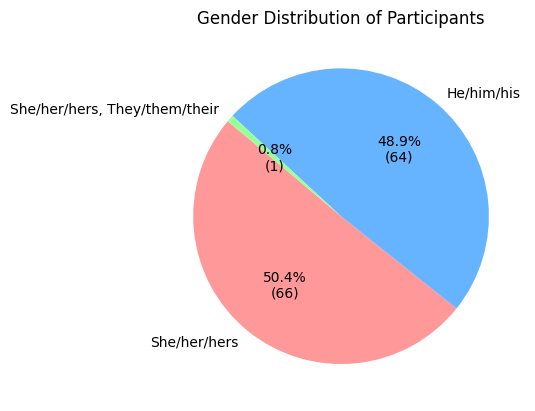

In [20]:
# Gender distribution of participants

def distribution_count(column):
    count = df[column].value_counts()
    return count

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val:d})'
    return my_format

gender_distribution = distribution_count("Preferred pronouns")
gender_distribution.drop(labels=['Prefer not to say'], inplace=True)

# Create a pie chart to show the distribution
labels = gender_distribution.keys()
sizes = gender_distribution.values
colors = ['#ff9999','#66b3ff','#99ff99']

plt.pie(sizes, labels=labels, colors=colors, autopct=autopct_format(sizes), startangle=140)
plt.title('Gender Distribution of Participants')
plt.show()

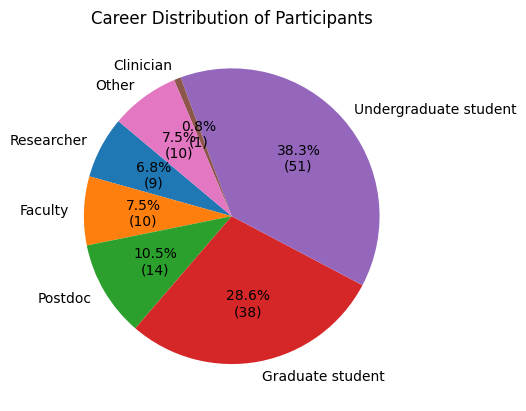

In [25]:
# Career Level Distribution of Participants
career_level_distribution = distribution_count("Career level")

# Create a pie chart to show the distribution
labels = career_level_distribution.keys()
sizes = career_level_distribution.values

# Group all career levels besides "Researcher", "Faculty", "Postdoc", "Graduate student", "Undergraduate student", "Clinician" into "Other"
lab = ['Researcher', 'Faculty', 'Postdoc', 'Graduate student', 'Undergraduate student', 'Clinician', 'Other']
sizes = [career_level_distribution['Researcher'], career_level_distribution['Faculty'], career_level_distribution['Postdoc'], career_level_distribution['Graduate student'], career_level_distribution['Undergraduate student'],career_level_distribution['Clinician'], career_level_distribution.drop(labels=['Researcher', 'Faculty', 'Postdoc', 'Graduate student', 'Undergraduate student', 'Clinician']).sum()]


plt.pie(sizes, labels=lab, autopct=autopct_format(sizes), startangle=140)
plt.title('Career Distribution of Participants')
plt.show()

{'Women': 62, 'Caregiver': 5, 'LGBTQI+': 16, 'Disabled': 4, 'Neurodiverse': 14, 'rural hometown': 1, 'Underrepresented country (based outside Europe & North America)': 17, 'Prefer not to say': 9, 'Non-Europrean ancenstry': 20, 'Latina': 1, 'first-gen college student': 1, 'questbridge': 1, 'first-generation college student': 1, 'None': 1, 'Latino': 1}
{'Women': 62, 'Caregiver': 5, 'LGBTQI+': 16, 'Disabled': 4, 'Neurodiverse': 14, 'Other': 36, 'Underrepresented country': 17}


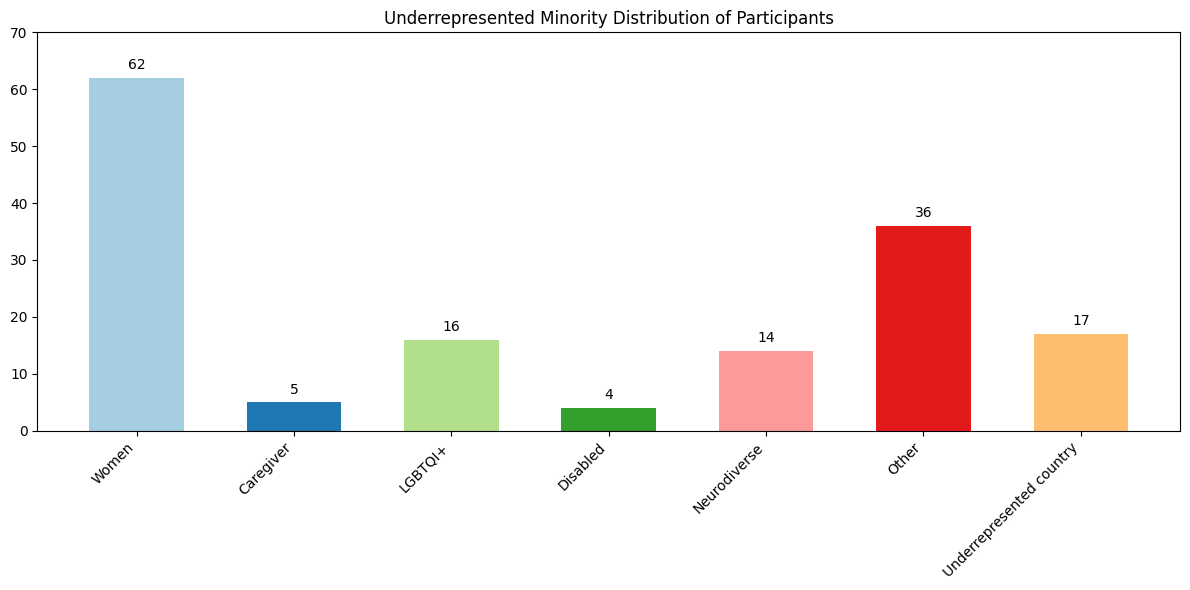

In [51]:
import matplotlib.pyplot as plt

# Underrepresented Minority Distribution of Participants 
dei = dict() 
question = 'Do you consider yourself a member of any of the following traditionally underrepresented groups in science?'
for i in df[question].dropna().values: 
    result = i.split(", ")
    for j in result: 
        if j in dei: 
            dei[j] += 1
        else: 
            dei[j] = 1
print(dei)

# Define the labels to keep
labels = ["Women", "LGBTQI+", "Disabled", "Neurodiverse", "Caregiver", "Non-European ancestry", "Underrepresented country (based outside Europe & North America)"]

# Calculate the "Other" category
other_count = sum(value for key, value in dei.items() if key not in labels)

# Filter out the keys not in labels and add "Other"
dei_filtered = {key: value for key, value in dei.items() if key in labels}
dei_filtered["Other"] = other_count
dei_filtered["Underrepresented country"] = dei_filtered.pop("Underrepresented country (based outside Europe & North America)")
# Print the filtered dictionary
print(dei_filtered)

# Bar chart for underrepresented minority distribution
plt.figure(figsize=(12, 6))
bars = plt.bar(dei_filtered.keys(), dei_filtered.values(), color=plt.cm.Paired(range(len(dei_filtered))), width=0.6)
plt.xticks(rotation=45, ha='right')
plt.title('Underrepresented Minority Distribution of Participants')
plt.tight_layout()

# Add text on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')

# Display the chart
plt.ylim(0, 70)
plt.show()

## Previous Skills Background

{'Python': 95, 'Web': 20, 'Java': 41, 'C++': 38, 'R': 52, 'Unix Command Line': 52, 'Containerization': 20, 'Documentation': 37, 'SQL': 1, 'PyTorch': 1, 'Matlab': 75, 'Shell Scripting': 45, 'I am currently learning Matlab for a course/research': 1, 'JavaScript': 1, 'GLSL': 1, 'Julia': 4, 'Workflows': 13, 'None': 1, 'Unity': 1, 'C#': 1, 'SAS': 1, 'SPSS': 1, 'C# (for Unity)': 1, 'It’s been a long time since I’ve used Matlab or R': 1}
{'Python': 95, 'Web': 20, 'Java': 41, 'C++': 38, 'R': 52, 'Unix Command Line': 52, 'Containerization': 20, 'Documentation': 37, 'Matlab': 75, 'Shell Scripting': 45, 'Julia': 4, 'Workflows': 13, 'Other': 9}


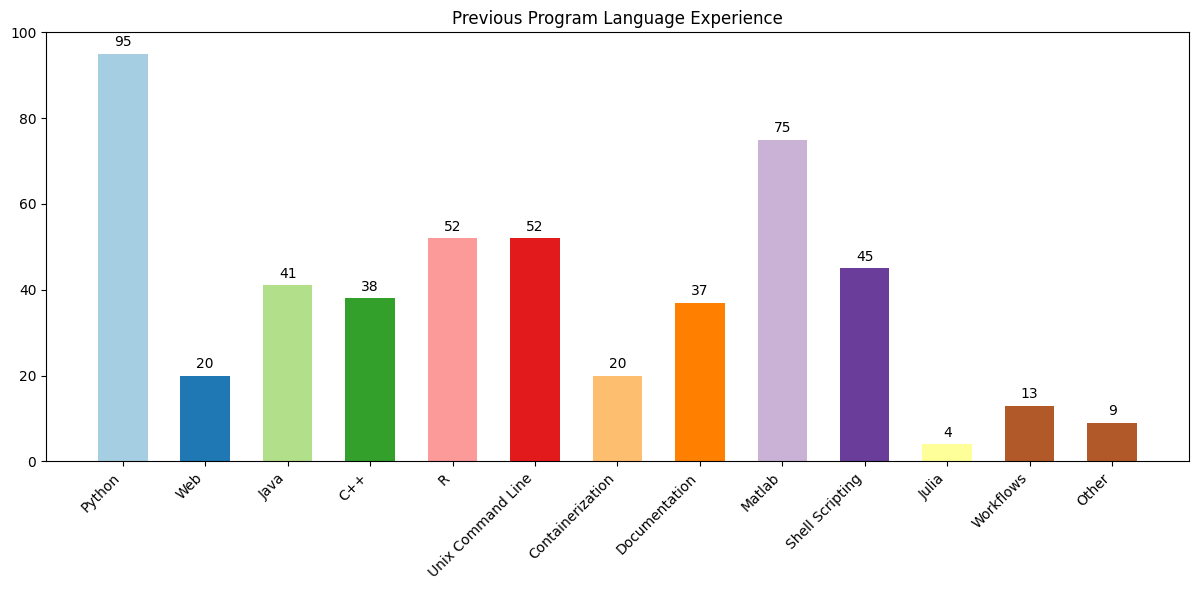

In [52]:
import matplotlib.pyplot as plt

# Previous Program Language Experience
pl = dict() 
question = 'I have experience in the following programming languages:'
for i in df[question].dropna().values: 
    result = i.split(", ")
    for j in result: 
        if j in pl: 
            pl[j] += 1
        else: 
            pl[j] = 1
print(pl)

# Drop the "Other" category
pl.pop("None", None)
pl.pop("It’s been a long time since I’ve used Matlab or R", None)
pl.pop("I am currently learning Matlab for a course/research", None)

labels = ["Python", "Matlab", "Julia", "Web", "Java", "C++", "R", "Unix Command Line", "Shell Scripting", "Workflows", "Containerization", "Documentation"] 
pl_filtered = {key: value for key, value in pl.items() if key in labels}
pl_filtered["Other"] = sum(value for key, value in pl.items() if key not in labels)
print(pl_filtered)

# Bar chart for previous program language experience
plt.figure(figsize=(12, 6))
bars = plt.bar(pl_filtered.keys(), pl_filtered.values(), color=plt.cm.Paired(range(len(pl_filtered))), width=0.6)
plt.xticks(rotation=45, ha='right')
plt.title('Previous Program Language Experience')
plt.tight_layout()

# Add text on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')

# Display the chart
plt.ylim(0, 100)
plt.show()

{'ECG': 6, 'EEG': 37, 'fMRI': 56, 'Wavelet Analysis': 1, 'Event-Related Desynchronization (ERD) and Synchronization (ERS)': 1, 'Canonical Neural Oscillator Modeling': 1, 'Brain Signal Processing': 1, 'Behavioral': 44, 'tDCS': 5, 'fNIRS': 4, 'Eye Tracking': 20, 'MRI': 39, 'PET': 6, 'MEG': 2, 'Psychoanalysis': 1, 'twenty years of clinical experience as licensed psychotherapist in both california and tennessee': 1, 'DWI': 20, 'TMS': 3, 'Lightsheet Microscopy ': 1, 'SEEG': 1, 'PSG': 1, '': 1, 'None': 1, 'Brief image registration experience': 1, 'PCA': 1, 'and linear regressions': 1, 'Omics data': 1, 'My background is in cellular and molecular neuroanatomy': 1, 'neurophysiology': 1, 'and optical imaging.  ': 1, 'ECoG': 1, 'HD-tACS': 1, 'neuro-informatics': 1, 'Invasive Electrodes': 1}
{'ECG': 6, 'EEG': 37, 'fMRI': 56, 'Behavioral': 44, 'tDCS': 5, 'fNIRS': 4, 'Eye Tracking': 20, 'MRI': 39, 'PET': 6, 'MEG': 2, 'DWI': 20, 'TMS': 3, 'ECoG': 1, 'Other': 20}


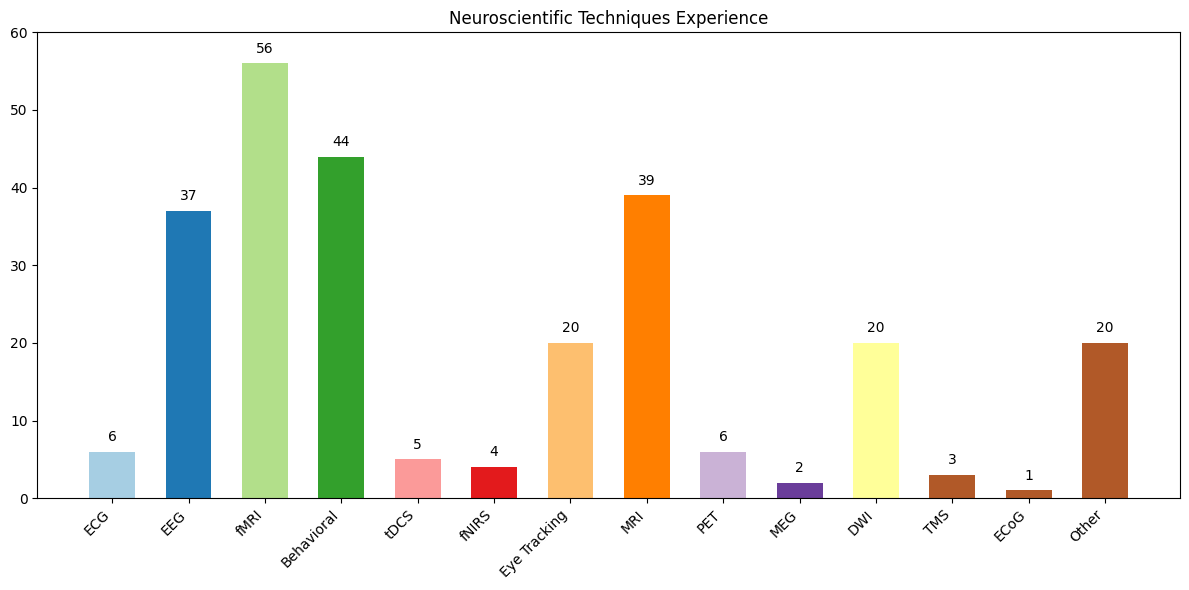

In [57]:
# Neuroscientific Techniques Experience

dct = dict() 
question = 'I have experience in the following neuroscientific techniques :'
for i in df[question].dropna().values: 
    result = i.split(", ")
    for j in result: 
        if j in dct: 
            dct[j] += 1
        else: 
            dct[j] = 1
print(dct)
dct.pop("None", None)

labels = [
    "Behavioral",
    "DWI",
    "ECG",
    "ECoG",
    "EEG",
    "Eye Tracking",
    "fMRI",
    "fNIRS",
    "MEG",
    "MRI",
    "PET",
    "tDCS",
    "TMS"
]

# Calculate the "Other" category
other_count = sum(value for key, value in dct.items() if key not in labels)

# Filter out the keys not in labels and add "Other"
dct_filtered = {key: value for key, value in dct.items() if key in labels}
dct_filtered["Other"] = other_count

# Print the filtered dictionary
print(dct_filtered)

# Bar chart for neuroscientific techniques experience
plt.figure(figsize=(12, 6))
bars = plt.bar(dct_filtered.keys(), dct_filtered.values(), color=plt.cm.Paired(range(len(dct_filtered))), width=0.6)
plt.xticks(rotation=45, ha='right')
plt.title('Neuroscientific Techniques Experience')
plt.tight_layout()

# Add text on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')

# Display the chart
plt.ylim(0, 60)
plt.show()

{'FieldTrip': 6, 'Brainstorm': 4, 'SPM': 23, 'BIDS': 20, 'fMRIPrep': 18, 'FSL': 40, 'Nipype': 8, 'AFNI': 19, 'Freesurfer': 25, 'ANTs': 19, 'DIPY': 7, 'MRtrix': 12, 'NWB': 2, 'FSL/SPM from coursework but at beginner level': 1, 'None': 1, '': 1, 'Compumedics (PSG/EEG)': 1, 'Datalad': 3, 'Through my work on the BRAIN Initiative I am involved in strategic assessments and planning for data resources and standards development': 1, 'including a number of the tools noted here.  ': 1, 'MNE': 1, 'EEGlab': 1, 'It’s been a long time since I’ve used neurosoftware ': 1, 'mostly bioinformatics software': 1}
{'FieldTrip': 6, 'Brainstorm': 4, 'SPM': 23, 'BIDS': 20, 'fMRIPrep': 18, 'FSL': 40, 'Nipype': 8, 'AFNI': 19, 'Freesurfer': 25, 'ANTs': 19, 'DIPY': 7, 'MRtrix': 12, 'NWB': 2, 'Datalad': 3, 'Other': 9}


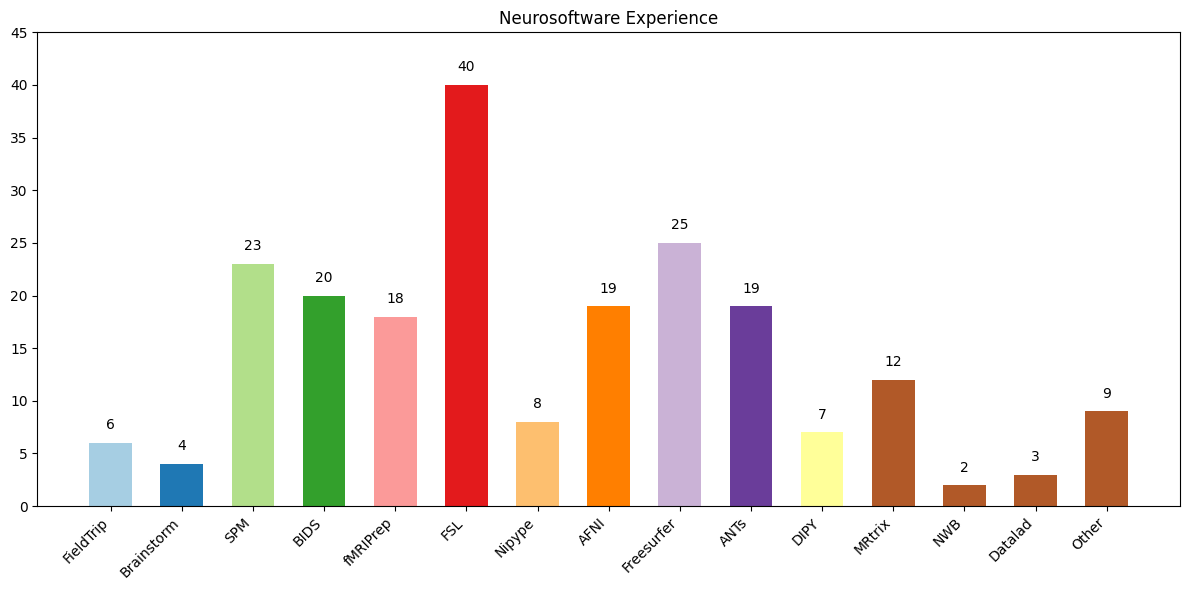

In [59]:
import matplotlib.pyplot as plt

# Neurosoftware Experience
dct = dict() 
question = 'I have experience in the following neurosoftware :'
for i in df[question].dropna().values: 
    result = i.split(", ")
    for j in result: 
        if j in dct: 
            dct[j] += 1
        else: 
            dct[j] = 1
print(dct)
dct.pop("None", None)

neurosoftware_experience = [
    "SPM",
    "FSL",
    "Freesurfer",
    "AFNI",
    "ANTs",
    "Nipype",
    "DIPY",
    "MRtrix",
    "FieldTrip",
    "Brainstorm",
    "BIDS",
    "NWB",
    "Datalad",
    "C-PAC",
    "fMRIPrep",
]

# Calculate the "Other" category
other_count = sum(value for key, value in dct.items() if key not in neurosoftware_experience)

# Filter out the keys not in neurosoftware_experience and add "Other"
dct_filtered = {key: value for key, value in dct.items() if key in neurosoftware_experience}
dct_filtered["Other"] = other_count

# Print the filtered dictionary
print(dct_filtered)

# Bar chart for neurosoftware experience
plt.figure(figsize=(12, 6))
bars = plt.bar(dct_filtered.keys(), dct_filtered.values(), color=plt.cm.Paired(range(len(dct_filtered))), width=0.6)
plt.xticks(rotation=45, ha='right')
plt.title('Neurosoftware Experience')
plt.tight_layout()

# Add text on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')

# Display the chart
plt.ylim(0, 45)
plt.show()

{'Bayesian Approaches': 33, 'Data Visualisation': 74, 'Deep Learning': 54, 'Diffusion': 22, 'EEG Event related response modelling': 16, 'Hypothesis Testing': 39, 'Machine Learning': 70, 'Modelling': 43, 'Neural Networks': 50, 'PCA': 39, 'Reinforcement Learning': 25, 'Reproducible Scientific Methods': 24, 'Statistical Modelling': 48, 'Nonlinear Oscillator Analysis': 1, 'Wavelet Transformations': 1, 'Event-Related Synchronization (ERS)': 1, 'Causality': 16, 'EEG  Source Modelling': 9, 'ICA': 22, 'Neural Encoding': 11, 'Diversity Inclusivity Equality': 15, 'Physiology': 19, 'Connectome': 15, 'Tractography': 11, 'Information Theory': 11, 'Neural Decoding': 13, 'Single Neuron Models': 12, 'Systems Neuroscience': 17, 'MR Methodologies': 12, 'Systems identification and control': 1, 'Granger Causality': 2, 'Dentric Computation': 1, 'MMN': 1, 'None': 1}
{'Bayesian Approaches': 33, 'Data Visualisation': 74, 'Deep Learning': 54, 'Diffusion': 22, 'EEG Event related response modelling': 16, 'Hypoth

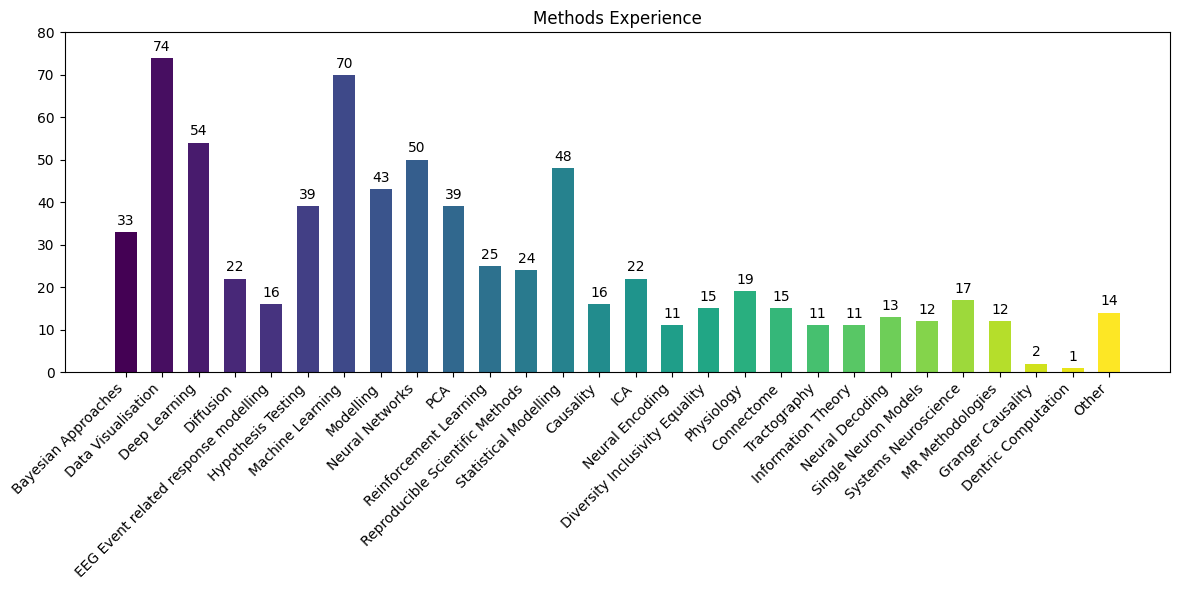

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Methods Experience
dct = dict() 
question = 'I have experience in the following methods: '
for i in df[question].dropna().values: 
    result = i.split(", ")
    for j in result: 
        if j in dct: 
            dct[j] += 1
        else: 
            dct[j] = 1
print(dct)
dct.pop("None", None)

labels = [
    "Bayesian Approaches",
    "Causality",
    "Connectome",
    "Data Visualisation",
    "Deep Learning",
    "Dentric Computation",
    "Diffusion",
    "Diversity Inclusivity Equality",
    "EEG Event related response modelling",
    "EEG Source Modelling",
    "Granger Causality",
    "Hypothesis Testing",
    "ICA",
    "Information Theory",
    "Machine Learning",
    "Modelling",
    "MR Methodologies",
    "Neural Decoding",
    "Neural Encoding",
    "Neural Networks",
    "PCA",
    "Physiology",
    "Reinforcement Learning",
    "Reproducible Scientific Methods",
    "Single Neuron Models",
    "Statistical Modelling",
    "Systems Neuroscience",
    "Tractography",
    "Other"
]

# Calculate the "Other" category
other_count = sum(value for key, value in dct.items() if key not in labels)

# Filter out the keys not in labels and add "Other"
dct_filtered = {key: value for key, value in dct.items() if key in labels}
dct_filtered["Other"] = other_count

# Print the filtered dictionary
print(dct_filtered)

# Generate a color map with enough colors
num_colors = len(dct_filtered)
colors = plt.cm.viridis(np.linspace(0, 1, num_colors))

# Bar chart for methods experience
plt.figure(figsize=(12, 6))
bars = plt.bar(dct_filtered.keys(), dct_filtered.values(), color=colors, width=0.6)
plt.xticks(rotation=45, ha='right')
plt.title('Methods Experience')
plt.tight_layout()

# Add text on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')

# Display the chart
plt.ylim(0, 80)
plt.show()

{'3 Continuous Integration': 20, '0 None': 48, '1 Commit & Push': 46, '2 Branches & PRs': 41}
{'3 Continuous Integration': 20, '0 None': 48, '1 Commit & Push': 46, '2 Branches & PRs': 41}


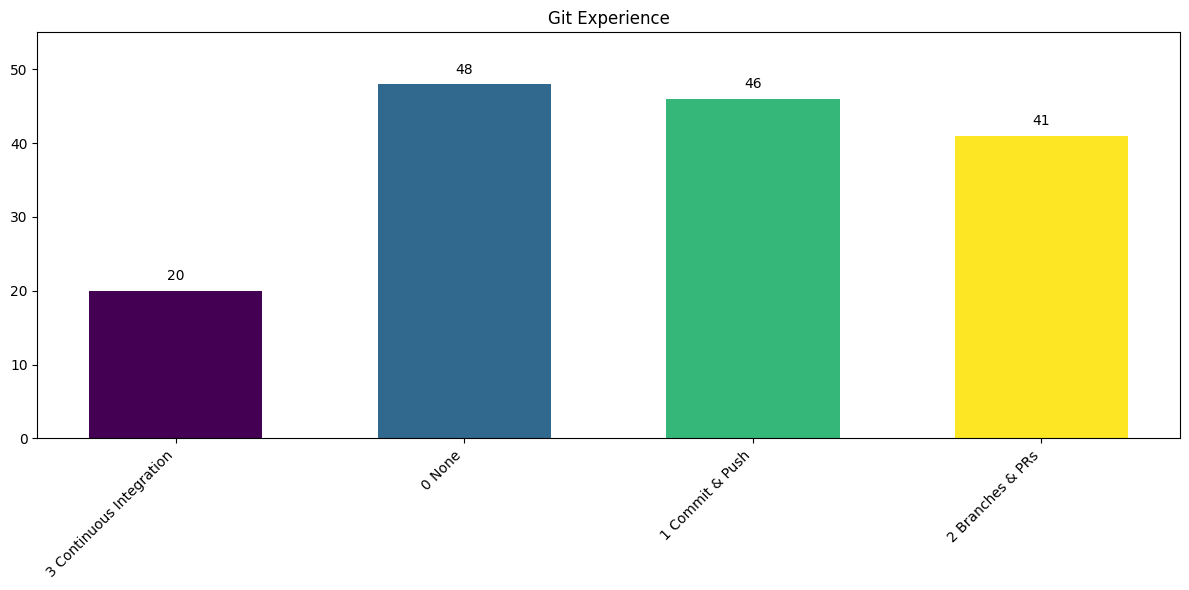

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Methods Experience
dct = dict() 
question = 'My experience with Git is...'
for i in df[question].dropna().values:
    # Replace "2 Branches, PRs" with "2 Branches & PRs" before splitting
    i = i.replace("2 Branches, PRs", "2 Branches & PRs")
    result = i.split(", ")
    for j in result: 
        if j in dct: 
            dct[j] += 1
        else: 
            dct[j] = 1
print(dct)
dct.pop("None", None)

labels = [
    "0 None",
    "1 Commit & Push",
    "2 Branches & PRs",
    "3 Continuous Integration"
]

# Calculate the "Other" category
other_count = sum(value for key, value in dct.items() if key not in labels)

# Filter out the keys not in labels and add "Other"
dct_filtered = {key: value for key, value in dct.items() if key in labels}

# Print the filtered dictionary
print(dct_filtered)

# Generate a color map with enough colors
num_colors = len(dct_filtered)
colors = plt.cm.viridis(np.linspace(0, 1, num_colors))

# Bar chart for Git experience
plt.figure(figsize=(12, 6))
bars = plt.bar(dct_filtered.keys(), dct_filtered.values(), color=colors, width=0.6)
plt.xticks(rotation=45, ha='right')
plt.title('Git Experience')
plt.tight_layout()
plt.ylim(0, 55)

# Add text on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')

# Display the chart
plt.show()